In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

dir = "/content/drive/MyDrive/Tugas_Akhir/dataset"

Mounted at /content/drive/


Total Files : 1398


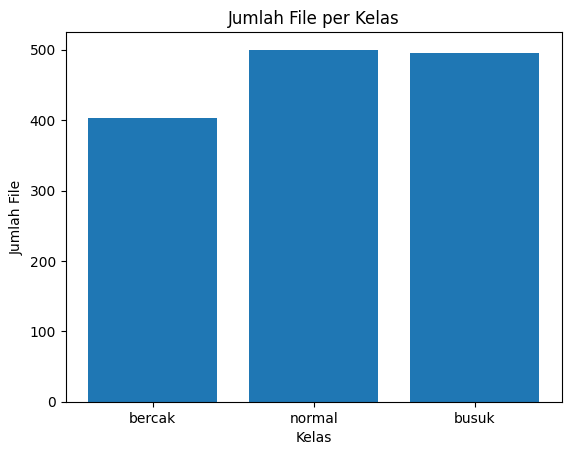

In [ ]:
# Visualisasi jumlah gambar tiap kelas
import matplotlib.pyplot as plt
import os

label = {}
total_files = 0
for i in os.listdir(dir):
    counting = len(os.listdir(os.path.join(dir, i)))
    label[i] = counting
    total_files += counting

print("Total Files : " + str(total_files))

plt.bar(label.keys(), label.values());
plt.title("Jumlah File per Kelas");
plt.xlabel('Kelas');
plt.ylabel('Jumlah File');

In [ ]:
import tensorflow as tf

data = tf.keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.3
)

In [ ]:
image_size = (200,200)
batch_size = 32
seed = 999

train_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='training',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

valid_data = data.flow_from_directory(
    dir,
    class_mode='categorical',
    subset='validation',
    target_size=image_size,
    batch_size=batch_size,
    seed=seed
)

Found 980 images belonging to 3 classes.
Found 418 images belonging to 3 classes.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255)
  ]
)



In [ ]:
augmentation = tf.keras.models.Sequential(data_augmentation)

# **Modeling**

Skenario 4 (optimizer adam, epoch : 10, learning rate : 0.01)

In [ ]:
base_model = tf.keras.applications.DenseNet201(include_top=False,
                                                        weights='imagenet',
                                                        input_shape=(image_size[0], image_size[1], 3),
                                                        pooling='max')
base_model.trainable=False
train_data.preprocessing_function = tf.keras.applications.densenet.preprocess_input

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
densenet_model_10 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model_skenario_10 = densenet_model
model_skenario_10.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
# Melatih model DenseNet201
model_hist_10 = model_skenario_10.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 553s 17s/step - loss: 2.9896 - accuracy: 0.6510 - val_loss: 0.5700 - val_accuracy: 0.8971
Epoch 2/10
31/31 [==============================] - 463s 15s/step - loss: 0.5663 - accuracy: 0.8867 - val_loss: 0.4141 - val_accuracy: 0.9234
Epoch 3/10
31/31 [==============================] - 469s 15s/step - loss: 0.3526 - accuracy: 0.9204 - val_loss: 0.3546 - val_accuracy: 0.9282
Epoch 4/10
31/31 [==============================] - 458s 15s/step - loss: 0.2779 - accuracy: 0.9224 - val_loss: 0.3845 - val_accuracy: 0.9234
Epoch 5/10
31/31 [==============================] - 460s 15s/step - loss: 0.2880 - accuracy: 0.9224 - val_loss: 0.2977 - val_accuracy: 0.9402
Epoch 6/10
31/31 [==============================] - 460s 15s/step - loss: 0.2738 - accuracy: 0.9286 - val_loss: 0.4399 - val_accuracy: 0.8971
Epoch 7/10
31/31 [==============================] - 463s 15s/step - loss: 0.3520 - accuracy: 0.9163 - val_loss: 0.4598 - val_accuracy: 0.8971
Epoch 

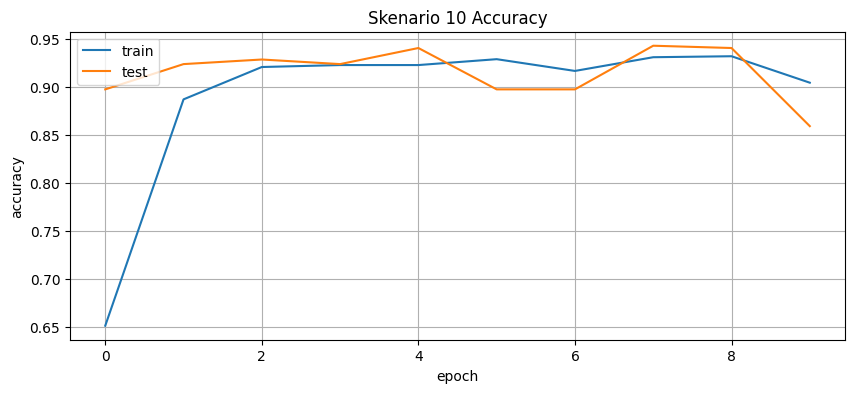

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_10.history['accuracy'])
plt.plot(model_hist_10.history['val_accuracy'])
plt.title('Skenario 10 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 4 (optimizer : RMSprop, Epoch : 5, learning rate : 0.001)

In [ ]:
model_skenario_11 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_11 = densenet_mode
model_skenario_11.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
model_hist_11 = model_skenario_11.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 477s 15s/step - loss: 6.1370 - accuracy: 0.6378 - val_loss: 1.3745 - val_accuracy: 0.8038
Epoch 2/10
31/31 [==============================] - 462s 15s/step - loss: 2.3447 - accuracy: 0.7857 - val_loss: 0.6264 - val_accuracy: 0.9091
Epoch 3/10
31/31 [==============================] - 464s 15s/step - loss: 1.4485 - accuracy: 0.8449 - val_loss: 1.9839 - val_accuracy: 0.8134
Epoch 4/10
31/31 [==============================] - 463s 15s/step - loss: 1.4942 - accuracy: 0.8510 - val_loss: 0.7042 - val_accuracy: 0.9234
Epoch 5/10
31/31 [==============================] - 460s 15s/step - loss: 1.5871 - accuracy: 0.8622 - val_loss: 0.7450 - val_accuracy: 0.9115
Epoch 6/10
31/31 [==============================] - 465s 15s/step - loss: 1.4373 - accuracy: 0.8714 - val_loss: 1.6932 - val_accuracy: 0.8493
Epoch 7/10
31/31 [==============================] - 464s 15s/step - loss: 1.0731 - accuracy: 0.9041 - val_loss: 0.6583 - val_accuracy: 0.9354
Epoch 

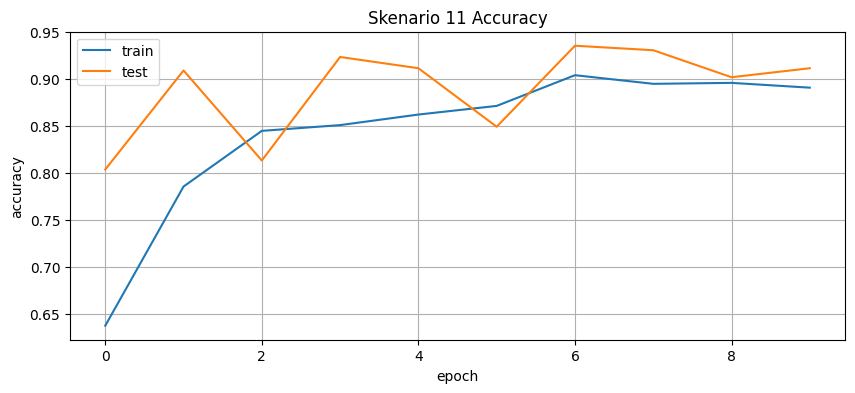

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_11.history['accuracy'])
plt.plot(model_hist_11.history['val_accuracy'])
plt.title('Skenario 11 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()

skenario 12 (optimizer : RMSprop, Epoch : 10, learning rate : 0.01)

In [ ]:
model_skenario_12 = tf.keras.models.Sequential([
  data_augmentation,
  base_model,
  tf.keras.layers.Dense(3, activation='softmax')
])

model_skenario_12 = densenet_mode
model_skenario_12.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    metrics=['accuracy']
  )

In [ ]:
model_hist_12 = model_skenario_12.fit(
    train_data,
    epochs=10,
    validation_data = valid_data
)

Epoch 1/10
31/31 [==============================] - 606s 19s/step - loss: 3.2746 - accuracy: 0.6582 - val_loss: 0.4432 - val_accuracy: 0.8876
Epoch 2/10
31/31 [==============================] - 461s 15s/step - loss: 0.6815 - accuracy: 0.8469 - val_loss: 0.4293 - val_accuracy: 0.9139
Epoch 3/10
31/31 [==============================] - 465s 15s/step - loss: 0.5634 - accuracy: 0.8765 - val_loss: 0.4548 - val_accuracy: 0.8876
Epoch 4/10
31/31 [==============================] - 464s 15s/step - loss: 0.5904 - accuracy: 0.8622 - val_loss: 0.3619 - val_accuracy: 0.9163
Epoch 5/10
31/31 [==============================] - 464s 15s/step - loss: 0.3534 - accuracy: 0.9102 - val_loss: 0.2473 - val_accuracy: 0.9378
Epoch 6/10
31/31 [==============================] - 463s 15s/step - loss: 0.3336 - accuracy: 0.9082 - val_loss: 0.2542 - val_accuracy: 0.9306
Epoch 7/10
31/31 [==============================] - 462s 15s/step - loss: 0.3454 - accuracy: 0.9143 - val_loss: 0.2655 - val_accuracy: 0.9258
Epoch 

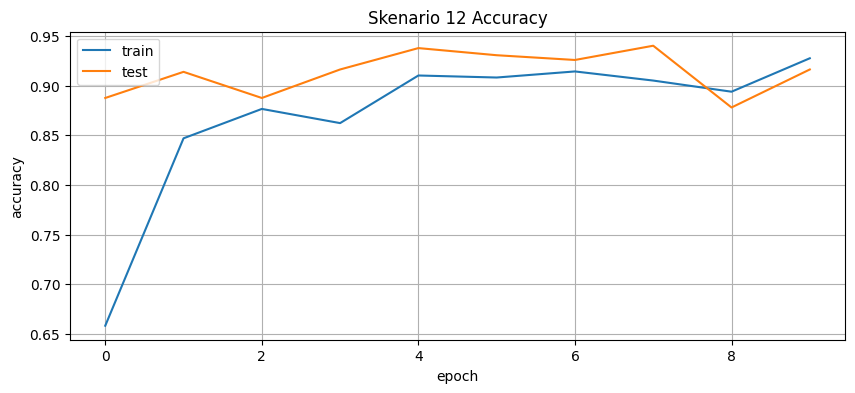

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(model_hist_12.history['accuracy'])
plt.plot(model_hist_12.history['val_accuracy'])
plt.title('Skenario 12 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

print()